## Lesson 3 Decison Tree/Random Forrest Hands-On Helper

### Import Packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import os
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# Shark Attacks

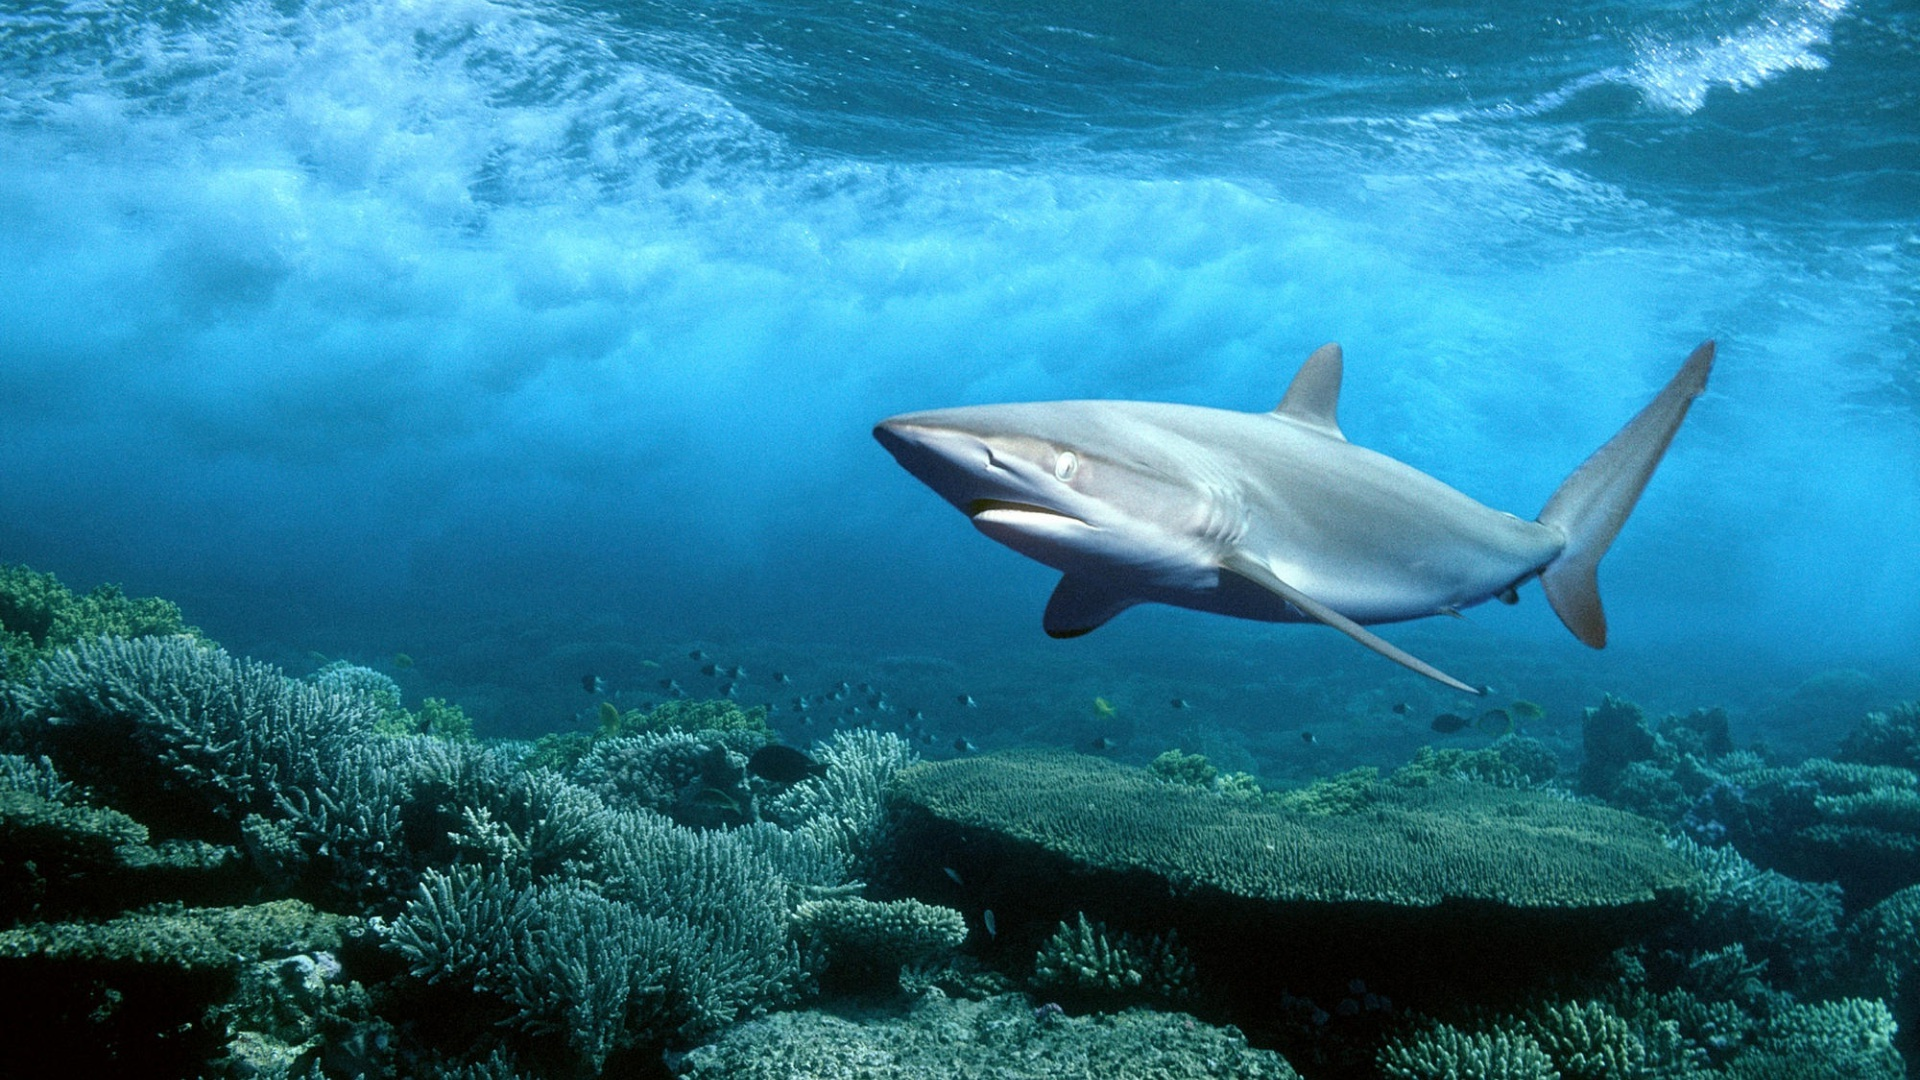

In [26]:
from IPython.display import Image
Image('https://www.baltana.com/files/wallpapers-6/Shark-Best-Wallpaper-19471.jpg')

In [27]:
Sharks = pd.read_csv('https://query.data.world/s/hojq6f5jh2werpne7iauhqcxobib6t')

In [28]:
Sharks.head(10)

,date,time,location,area,activity,species,injury,fatal_y_n
0,01-Oct-2011,NaN,"Gulf Shores, Baldwin County",Alabama,NaN,NaN,Lacerations to right wrist and middle finger,N
1,02-Jul-2004,16h40,"Gulf Shores Beach, Baldwin County",Alabama,Wading,4' to 5' shark,Right foot lacerated,N
2,06-Sep-2014,13h00,"Katrina Cut, Dauphin Island, Mobile County",Alabama,Fishing,Bull shark,Leg bitten,N
3,09-Jun-2000,06h45,"Gulf Shores, Baldwin County",Alabama,Swimming,Bull shark,Right forearm severed surgically amputated abo...,N
4,09-Jun-2000,06h45,"Gulf Shores, Baldwin County",Alabama,Swimming,Bull shark?,Puncture wounds on right hip and arm,N
5,13-Jun-1881,NaN,Mobile Bay,Alabama,Fell overboard,NaN,FATAL,Y
6,15-Aug-2012,NaN,"Gulf Shores, Baldwin County",Alabama,Wading or swimming,NaN,Lacerations to leg,N
7,15-Jun-1975,NaN,5 miles off the coast,Alabama,Swimming near his boat,NaN,Left leg bitten,N
8,17-Aug-2002,17h00,"Gulf of Mexico, 65 miles offshore from Mobile",Alabama,Swimming,NaN,Both arms & leg bitten,N
9,19-Jul-2013,14h30,"Gulf Shores, Baldwin County",Alabama,Walking in surf,NaN,Lacerations and abrasions to foot and ankle,N


## Part 1

Part I
Create a decision tree model of the Shark Attacks dataset that predicts survival from seaborn. You will need to import the data using this code:
You will need to compute some data wrangling before charging ahead. Make sure to complete the following wrangling tasks:

Can decision tree handle categorical variables?
Decision tree can handle both numerical and categorical variables at the same time as features. There is not any problem in doing that. HOwever, Most of the algorithms (or ML libraries) produce better result with numerical variables. 

        -Recode string data
        -Remove missing data
        -Drop any variables that are redundant and will add to multicollinearity.
        -Once you have created a decision tree model, interpret the confusion matrix and classification report.

### Inspecting your data set

The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Whether to print the full summary. By default, the setting in pandas.

value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element

In [105]:
Sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1748 non-null   object
 1   time       1202 non-null   object
 2   location   1719 non-null   object
 3   area       1747 non-null   object
 4   activity   1660 non-null   object
 5   species    923 non-null    object
 6   injury     1747 non-null   object
 7   fatal_y_n  1746 non-null   object
dtypes: object(8)
memory usage: 109.4+ KB


### Recode you columns




In [20]:
def recode_activity(activity):
    if activity == 'Surfing':
        return 0
    if activity == 'Swimming':
        return 1
    if activity == 'Wading':
        return 2
    if activity == 'Standing':
        return 3
    if activity == 'Spearfishing':
        return 4
    if activity == 'Fishing':
        return 5
    if activity == 'Bathing':
        return 6
    if activity == 'Snorkeling':
        return 7
    else:
        return np.NaN
    
Sharks["activityR"] = Sharks["activity"].apply(recode_activity)

In [21]:
Sharks.head()

,date,time,location,area,activity,species,injury,fatal_y_n,activityR
0,01-Oct-2011,NaN,"Gulf Shores, Baldwin County",Alabama,NaN,NaN,Lacerations to right wrist and middle finger,N,NaN
1,02-Jul-2004,16h40,"Gulf Shores Beach, Baldwin County",Alabama,Wading,4' to 5' shark,Right foot lacerated,N,2.0
2,06-Sep-2014,13h00,"Katrina Cut, Dauphin Island, Mobile County",Alabama,Fishing,Bull shark,Leg bitten,N,5.0
3,09-Jun-2000,06h45,"Gulf Shores, Baldwin County",Alabama,Swimming,Bull shark,Right forearm severed surgically amputated abo...,N,1.0
4,09-Jun-2000,06h45,"Gulf Shores, Baldwin County",Alabama,Swimming,Bull shark?,Puncture wounds on right hip and arm,N,1.0


In [24]:
Sharks.date.value_counts()

28-Jul-1995             5
12-Apr-2001             5
20-Sep-2015             4
Reported 10-Oct-1906    4
05-Oct-2003             4
                       ..
15-Mar-2008             1
15-Jun-2013             1
15-Jun-2006             1
15-Jul-2003             1
Reported 12-Jul-1771    1
Name: date, Length: 1575, dtype: int64

In [111]:
Sharks.value_counts()

date            area            activity      
14-Jun-2012     South Carolina  Swimming          4
20-Apr-2003     Florida         Surfing           3
28-Jul-1995     Florida         Surfing           3
12-Apr-2001     Florida         Surfing           3
18-Sep-2016     Florida         Surfing           3
                                                 ..
12-Jun-2011     Florida         Scuba diving      1
12-Jun-2007     Florida         Swimming          1
12-Jun-2001     Texas           Swimming          1
12-Jun-1999     Florida         Swimming          1
Summer of 1883  Florida         Fell overboard    1
Length: 1600, dtype: int64

### Dropping useless columns and recoding string data

Decision trees or random forests will take string variables, so all the categorical data needs to be recoded from string to numbers, keeping a codebook. Also, look at your columns to see if you can remove those not helpful in your analysis. Find the columns you could use to predict where shark attacks might happen.


In [108]:
Sharks.drop(['time','fatal_y_n','injury','species','location'], axis=1, inplace=True)

In [109]:
Sharks.head()

,date,area,activity
0,01-Oct-2011,Alabama,NaN
1,02-Jul-2004,Alabama,Wading
2,06-Sep-2014,Alabama,Fishing
3,09-Jun-2000,Alabama,Swimming
4,09-Jun-2000,Alabama,Swimming


### Recode your Columns 

In [136]:
cleanup = {"area": {"Florida ": 1,"Hawaii": 3,"California": 4,"South Carolina": 5,"North Carolina": 6,"Texas": 7,"Oregon ": 8,"New Jersey  ": 9,"New York  ": 10,
                    "Alabama": 11,"Virginia": 12,"Georgia": 13,"Puerto Rico ": 14,"Louisiana ": 15,"Massachusetts ": 16,"Rhode Island ": 17,"Mississippi ": 18,"US Virgin Islands ": 19,
                    "Maryland": 20,"Delaware": 21,"Connecticut ": 22,"Washington": 23,"Palmyra Atoll": 24,"Maine": 25,"Johnston Atoll": 26, "Guam": 27,"East coast": 28,"Wake Island": 29,
                    "Midway Atoll": 30},
            "activity":{"Surfing ": 0, "Swimming": 1, "Wading": 2,"Standing ": 3,"Spearfishing": 4,"Walking in chest-deep water": 5,"Standing / surfing": 6,"Surfing, collided with shark ": 7,
                        "Floating in inner tube": 8,"Spearfishing on scuba & transferring fish onto a stringer": 9,"Surfing": 10, "Boogie boarding": 11,"Bathing": 12,"Surfing": 13,
                        "Fishing": 14, "Fell overboard": 15, "Wading or swimming": 16,"Swimming near his boat": 17, "Walking in surf": 18, "Stand-Up Paddleboarding": 19,"Scuba diving": 20,
                        "Scuba diving (but on surface)": 21,"Abalone diving using Hookah": 22,"Hookah diving for sea urchins": 23, "": 24}}
                  
Sharks.replace(cleanup, inplace=True)

In [138]:
Sharks.head(30)

,date,area,activity
0,01-Oct-2011,11,NaN
1,02-Jul-2004,11,2
2,06-Sep-2014,11,14
3,09-Jun-2000,11,1
4,09-Jun-2000,11,1
5,13-Jun-1881,11,15
6,15-Aug-2012,11,16
7,15-Jun-1975,11,17
8,17-Aug-2002,11,1
9,19-Jul-2013,11,18
